In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

In [33]:
diabetes = pd.read_csv("diabetes.csv", sep = ",")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
diabetes.shape

(768, 9)

In [77]:
x = diabetes.iloc[:, :-1].values
y = diabetes["Outcome"].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0, stratify = y)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
neighbors = np.arange(1, 10)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    train_acc[i] = knn.score(x_train, y_train)
    test_acc[i] = knn.score(x_test, y_test)
    
    

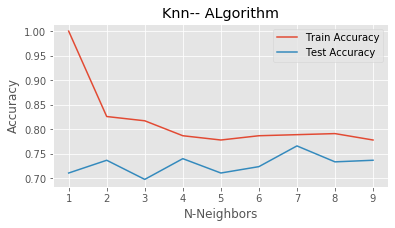

In [82]:
plt.figure(figsize=(6, 3))
plt.title("Knn-- ALgorithm")

plt.plot(neighbors, train_acc, label = "Train Accuracy")
plt.plot(neighbors, test_acc, label = "Test Accuracy")

plt.xlabel("N-Neighbors")
plt.ylabel("Accuracy")

plt.legend()

In [83]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [84]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [85]:
knn.score(x_test, y_test)

0.7662337662337663

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
y_pred = knn.predict(x_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[173,  28],
       [ 44,  63]], dtype=int64)

## Confusion matrix can be calculated using the crossTab in python pandas

In [89]:
pd.crosstab(y_test, y_pred, rownames = ["True"], colnames = ["Prediction"], margins = True)

Prediction,0,1,All
True,,,
0,173,28,201
1,44,63,107
All,217,91,308


In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       201
           1       0.69      0.59      0.64       107

    accuracy                           0.77       308
   macro avg       0.74      0.72      0.73       308
weighted avg       0.76      0.77      0.76       308



In [92]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {"n_neighbors": np.arange(1, 50)}

In [120]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv= 5)
grid.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
round(grid.best_score_, 4)

0.7579

In [122]:
grid.best_params_

{'n_neighbors': 14}